In [17]:
import pandas as pd
# from zipfile import ZipFile
import os
import re
# import json
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
# import wordcloud
# from sklearn.preprocessing import OneHotEncoder
# import matplotlib.animation as animation
import nltk
from nltk.corpus import wordnet
from ast import literal_eval
from statistics import mean
from IPython.display import Image, display
from myfunctions import *
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sns.set()

[nltk_data] Downloading package wordnet to /Users/aditya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
datadf = pd.read_csv('All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')
datadf.rename(columns={'Unnamed: 0':'id'}, inplace=True)
datadf.set_index('id', inplace=True)
datadf.head(2)

,text,date_modified,date_journal,address,lat,lon,posture,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...


In [30]:
freq_sleep_cal = pd.read_csv('All Data/Raw Journey Data/Freq_Sleep_Cal_Until16May2020.csv')
freq_sleep_cal.rename(columns={'Unnamed: 0':'num'}, inplace=True)
freq_sleep_cal.set_index('num', inplace=True)
freq_sleep_cal.head()

,date,caloriesBurnt,entryFrequency,minutesAsleep,minutesAwake,slept_late,bins
num,,,,,,,
0,2018-08-15,1454.40,2.0,356.8,28.1,0.0,2018-08-15
1,2018-08-16,1509.64,1.0,357.4,28.1,0.0,2018-08-15
2,2018-08-17,1996.21,7.0,390.0,7.0,1.0,2018-08-15
3,2018-08-18,1853.85,7.0,94.0,10.0,1.0,2018-08-15
4,2018-08-19,2054.30,0.0,357.9,28.2,1.0,2018-08-15


In [7]:
def binner(nbins, df):
    bin_size = round(len(df)/nbins)
    try:
        out = pd.cut(df.index, bins=nbins, include_lowest=False,labels=df.date[::bin_size]) #binning
    except:
        out = pd.cut(df.index, bins=nbins, include_lowest=False,labels=df.date[bin_size::bin_size].values)
    df['bins']=out
    return df

In [9]:
freq = datadf[['text']].copy()
freq['date'] = pd.DatetimeIndex(datadf.date_journal).date
freq = freq.groupby('date').agg({'text':'count'}).reset_index()
freq['date'] = freq['date'].astype(str)

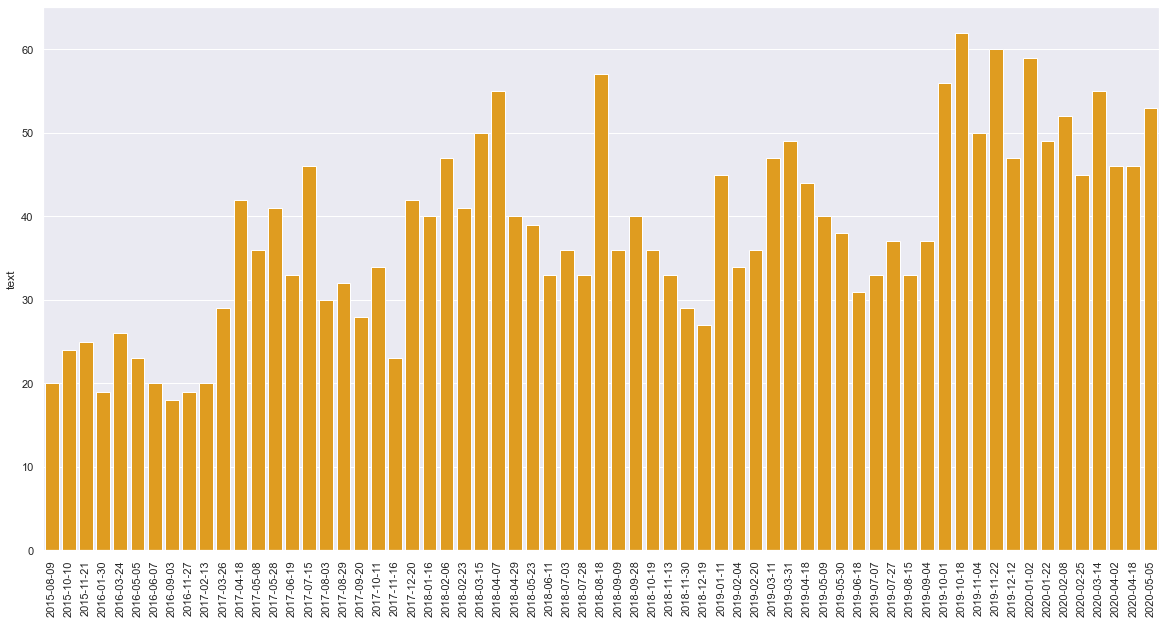

In [10]:
binner(65,freq)
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.barplot(freq.bins.unique(), freq.groupby('bins').sum()['text'], ax=ax, color='orange')
plt.savefig('/Users/aditya/Google Drive (as11919@nyu.edu)/Syncing with Mac/My Data Analysis/Figures saved from analyses/Frequency of Entries (16May2020).png')

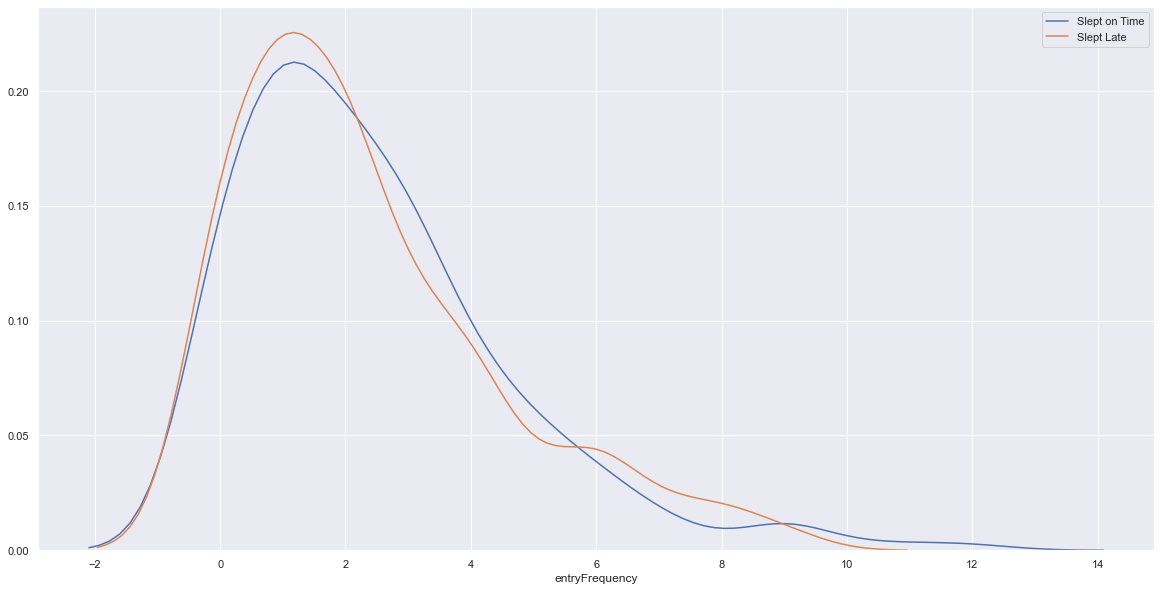

In [38]:
target_0 = freq_sleep_cal[freq_sleep_cal.slept_late==0]
target_1 = freq_sleep_cal[freq_sleep_cal.slept_late==1]

plt.figure(figsize=(20,10))
sns.distplot(target_0.entryFrequency, hist=False, label = 'Slept on Time')
sns.distplot(target_1.entryFrequency, hist=False, label = 'Slept Late')
plt.legend()

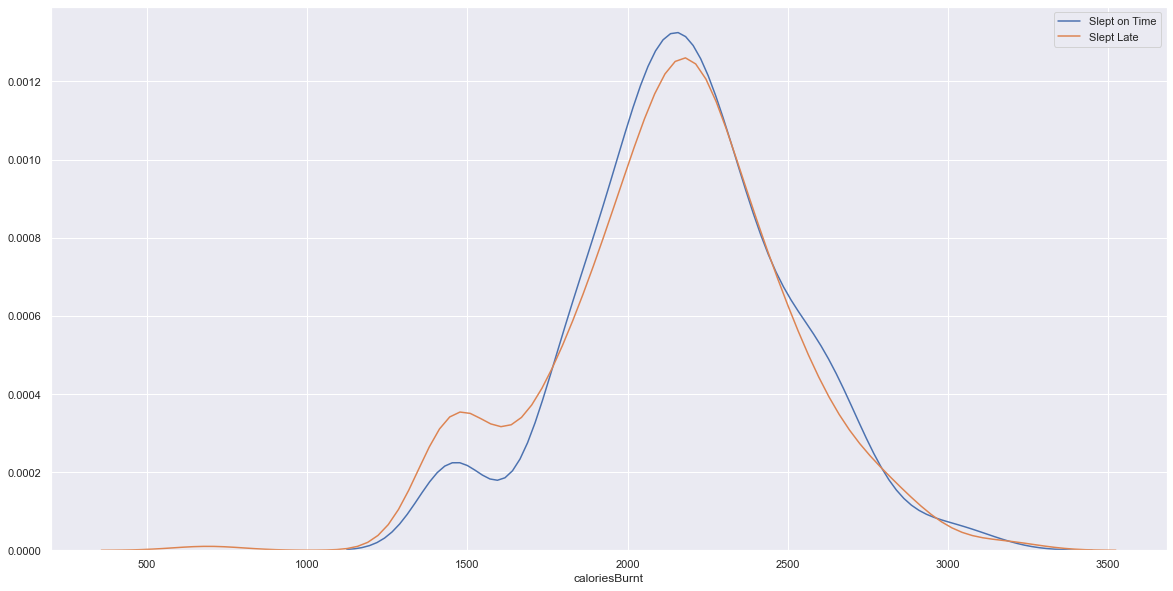

In [39]:
plt.figure(figsize=(20,10))
sns.distplot(target_0.caloriesBurnt, hist=False, label = 'Slept on Time')
sns.distplot(target_1.caloriesBurnt, hist=False, label = 'Slept Late')
plt.legend()

In [62]:
# sns.barplot(freq_sleep_cal.slept_late,freq_sleep_cal.caloriesBurnt)

In [63]:
# sns.barplot(freq_sleep_cal.slept_late,freq_sleep_cal.entryFrequency)

In [64]:
# sns.barplot(freq_sleep_cal.slept_late,freq_sleep_cal.minutesAsleep)

In [65]:
# sns.barplot(freq_sleep_cal.slept_late,freq_sleep_cal.minutesAwake)

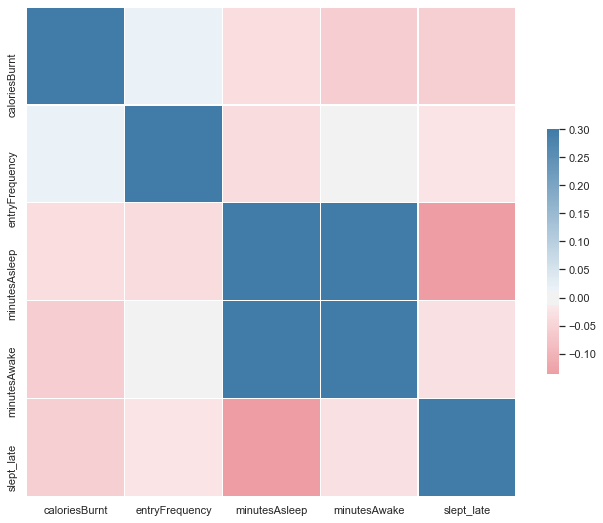

In [66]:
corr = freq_sleep_cal.corr()

# mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})